## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): _Соснин Артём_

### Общая информация

__Дата выдачи:__ 05.02.2020

__Дедлайн:__ 15.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib, а в качестве бонусного задания сможете реализовать алгоритм KNN.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}})\right) \times 10 / 21,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. Все баллы сверх обязательных (9 в первой части и 12 во второй) идут в бонус. Таким образом, за это домашнее задание можно получить 4 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Для успешного выполнения этой части вам необходимо пройти все `assert`'ы.

In [3]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [4]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return weights.dot(marks.T).round()

In [5]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [6]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [7]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [8]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [9]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [13]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
        array=np.subtract(array1,array2)
        return np.asarray(*np.where(abs(array)<precision))

In [12]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

AttributeError: 'tuple' object has no attribute 'ndim'

In [26]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

AttributeError: 'tuple' object has no attribute 'ndim'

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [27]:
def block_matrix(block: np.array) -> np.array:
    m = np.hstack((block, block))
    return np.vstack((m,m))

In [28]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [29]:
def diag_prod(matrix: np.array) -> int:
    d = matrix.diagonal()
    return d[d != 0].prod()

In [30]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [31]:
def normalize(matrix: np.array) -> np.array:
    return (matrix-np.mean(matrix, axis=0))/np.std(matrix, axis=0)

In [32]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [33]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [34]:
def antiderivative(coefs: np.array) -> np.array:
    p = np.poly1d(coefs)
    return np.polyint(p)

In [35]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [36]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [37]:
def make_symmetric(matrix: np.array) -> np.array:
    t = matrix.T.copy()
    np.fill_diagonal(t, 0)
    return matrix + t

In [38]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [39]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [40]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    t = np.arange(a, b + 1)
    return np.repeat(t, m).reshape(b - a + 1, m).T

In [41]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [42]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [43]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return vec1.dot(vec2.T)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))

In [44]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [45]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [46]:
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [87]:
data = pd.read_csv('train.csv', delimiter=',')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 12

In [48]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

- PassengerId - вещественный признак
- Survived - бинарный признак
- Pclass - порядковый признак
- Name - множествозначный признак
- Sex - бинарный признак 
- Age - вещественный признак
- SibSp - вещественный признак
- Parch - вещественный признак
- Ticket - порядковый признак
- Fare - вещественный признак
- Cabin - порядковый признак
- Embarked - категориальный признак

1. Можно решать задачу классификации: по входным данным пассажира понять выживет ли он
2. Задача кластеризации: к какому классу относится пассажир

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [49]:
data.groupby('Survived').size() / len(data) * 100

Survived
0    61.616162
1    38.383838
dtype: float64

In [50]:
survived = data[data['Survived'] == 1]
survived.groupby('Sex').size() / len(survived) * 100

Sex
female    68.128655
male      31.871345
dtype: float64

61.6% пассажиров погибло на Титанике, оставшиеся 38.4% выжило. Среди выживших после крушения 68.1% женщин и соответственно 31.9% мужчин.

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [51]:
data.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [52]:
data[data['Pclass'] == 3].groupby('Sex').size()

Sex
female    144
male      347
dtype: int64

Самым многолюдном классом является 3-й. В нём мужмин больше женщин (347 и 144 соответственно)

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [53]:
data['Fare'].min()

0.0

In [54]:
data['Fare'].mean()

32.2042079685746

In [55]:
data['Fare'].max()

512.3292

In [56]:
from_S = data[data['Embarked'] == 'S']
from_S['Fare'].min()

0.0

In [57]:
from_S['Fare'].mean()

27.07981180124218

In [58]:
from_S['Fare'].max()

263.0

In [59]:
from_C = data[data['Embarked'] == 'C']
from_Q = data[data['Embarked'] == 'Q']

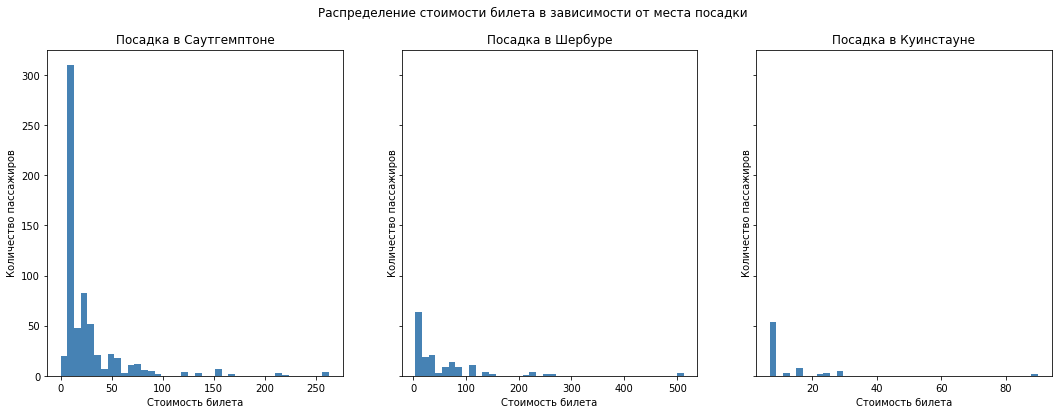

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18, 6))
ax = axs[0]
ax.hist(from_S['Fare'], histtype='stepfilled', color='steelblue', bins=40)
ax.set_xlabel("Стоимость билета")
ax.set_ylabel("Количество пассажиров")
ax.set_title("Посадка в Саутгемптоне")

ax = axs[1]
ax.hist(from_C['Fare'], histtype='stepfilled', color='steelblue', bins=40)
ax.set_xlabel("Стоимость билета")
ax.set_ylabel("Количество пассажиров")
ax.set_title("Посадка в Шербуре")

ax = axs[2]
ax.hist(from_Q['Fare'], histtype='stepfilled', color='steelblue', bins=40)
ax.set_xlabel("Стоимость билета")
ax.set_ylabel("Количество пассажиров")
ax.set_title("Посадка в Куинстауне")

fig.suptitle('Распределение стоимости билета в зависимости от места посадки')

plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Нет, имя и номер билета никак не влияют на спасение человека. Также ID человека это просто порядковый номер пассажира в таблице, который никак не влияет на остальные параметры.

In [61]:
data = data.drop(['PassengerId','Name','Ticket'], axis=1)

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [62]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [63]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

В данных есть пропуски. В столбце с возрастом 177 пропусков, с номером кабины 687, а в столбце с портом посадки 2 пропуска.

Поскольку в столбце с номером кабины большинство данных пропущенно, а именно 687 из 891, то данный признак можно опустить.

In [64]:
data = data.drop(['Cabin'], axis=1)

In [65]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [66]:
data[data['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [67]:
data.loc[data['Age'].isnull(), 'Age'] = round(data['Age'].mean())

Поскольку пропусков в столбце с возрастом не так много, то заполним их средним значением возраста пассажиров, у которых он указан.

In [68]:
data[data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [69]:
data.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

Большинство пассажиров село в Шербуре, поэтому двум пассажирам, у которых пропущено место посадки, впишем Шербур.

In [70]:
data.loc[data['Embarked'].isnull(), 'Embarked'] = 'S'

In [71]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

Пропусков не осталось.

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [72]:
data[['Fare','Age']].corr()

,Fare,Age
Fare,1.000000,0.090632
Age,0.090632,1.000000


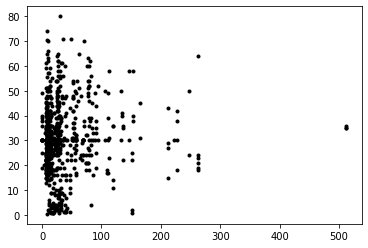

In [73]:
plt.plot(data['Fare'],data['Age'], 'ok', markersize=3)
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [74]:
mean = data['Fare'].mean()

In [75]:
data[data['Fare'] < mean].groupby('Survived').size()/len(data[data['Fare'] < mean])*100

Survived
0    68.235294
1    31.764706
dtype: float64

In [76]:
data[data['Fare'] > mean].groupby('Survived').size()/len(data[data['Fare'] > mean])*100

Survived
0    40.28436
1    59.71564
dtype: float64

Пассажиры со стоимостью билета выше средней действительно выживали с большим шансов. Среди них выжило 60%, в то время как только 32% пассажиров со стоимостью билетов ниже средней остались вживых.

In [77]:
data[['Survived','Pclass']].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


Поскольку коэффицент корреляции не близок к нулю, то есть зависимость выживаемости от класс. Отрицательный знак означает, что у пассажиров 1-го класса шанс выжить больше, чем у пассажиров 3-го класса.

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [78]:
data['Family'] = data['Parch'] + data['SibSp']

In [79]:
data['Lonely'] = [0 if i == 0 else 1 for i in data['Family']]

In [80]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Lonely
0,0,3,male,22.0,1,0,7.2500,S,1,1
1,1,1,female,38.0,1,0,71.2833,C,1,1
2,1,3,female,26.0,0,0,7.9250,S,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,1
4,0,3,male,35.0,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,0
887,1,1,female,19.0,0,0,30.0000,S,0,0
888,0,3,female,30.0,1,2,23.4500,S,3,1
889,1,1,male,26.0,0,0,30.0000,C,0,0


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [81]:
age_bins = [0, 12,25, 50, 90]
data['Age group'] = pd.cut(data['Age'],age_bins,labels = ['Child','Young','Adult','Elderly'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Lonely,Age group
0,0,3,male,22.0,1,0,7.2500,S,1,1,Young
1,1,1,female,38.0,1,0,71.2833,C,1,1,Adult
2,1,3,female,26.0,0,0,7.9250,S,0,0,Adult
3,1,1,female,35.0,1,0,53.1000,S,1,1,Adult
4,0,3,male,35.0,0,0,8.0500,S,0,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,0,Adult
887,1,1,female,19.0,0,0,30.0000,S,0,0,Young
888,0,3,female,30.0,1,2,23.4500,S,3,1,Adult
889,1,1,male,26.0,0,0,30.0000,C,0,0,Adult


In [82]:
survived_in_group = data.groupby('Age group').sum()['Survived']
survived_in_group

Age group
Child       40
Young       84
Adult      196
Elderly     22
Name: Survived, dtype: int64

In [83]:
total_in_group = data['Age group'].value_counts()
total_in_group

Adult      526
Young      232
Child       69
Elderly     64
Name: Age group, dtype: int64

In [84]:
survived_in_group/total_in_group

Child      0.579710
Young      0.362069
Adult      0.372624
Elderly    0.343750
dtype: float64

У детей был наибольший шанс спастись в катастрофе.

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

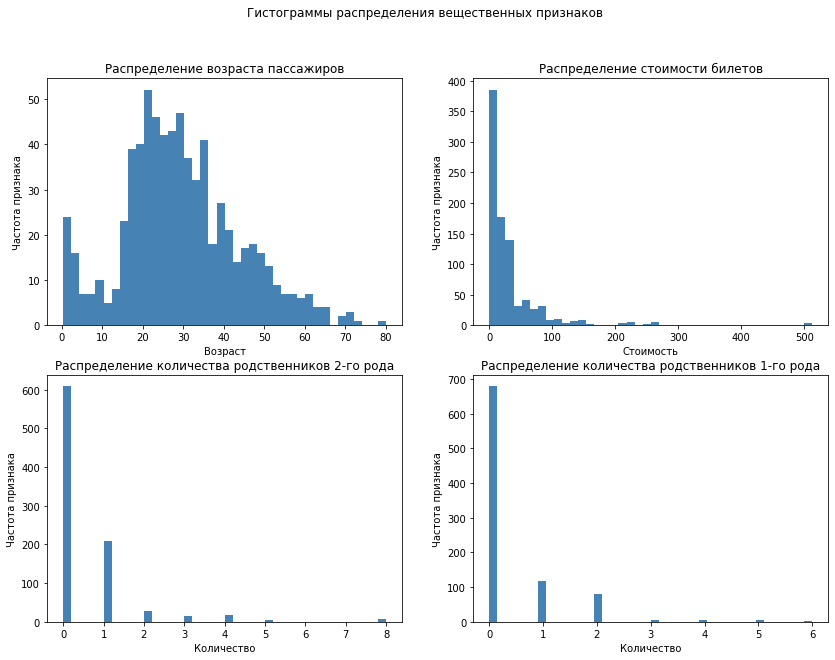

In [89]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
ax = axs[0,0]
ax.hist(data['Age'], histtype='stepfilled', color='steelblue', bins=40)
ax.set_xlabel("Возраст")
ax.set_ylabel("Частота признака")
ax.set_title("Распределение возраста пассажиров")

ax = axs[0,1]
ax.hist(data['Fare'], histtype='stepfilled', color='steelblue', bins=40)
ax.set_xlabel("Стоимость")
ax.set_ylabel("Частота признака")
ax.set_title("Распределение стоимости билетов")

ax = axs[1,0]
ax.hist(data['SibSp'], histtype='stepfilled', color='steelblue', bins=40)
ax.set_xlabel("Количество")
ax.set_ylabel("Частота признака")
ax.set_title("Распределение количества родственников 2-го рода")

ax = axs[1,1]
ax.hist(data['Parch'], histtype='stepfilled', color='steelblue', bins=40)
ax.set_xlabel("Количество")
ax.set_ylabel("Частота признака")
ax.set_title("Распределение количества родственников 1-го рода")

fig.suptitle('Гистограммы распределения вещественных признаков')

plt.show()

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

Да, пол и место посадки.

In [86]:
pd.get_dummies(data, columns=['Sex', 'Embarked'])

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Lonely,Age group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,1,Young,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,Adult,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,Adult,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,Adult,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,Adult,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,Adult,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,Young,1,0,0,0,1
888,0,3,30.0,1,2,23.4500,3,1,Adult,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,0,Adult,0,1,1,0,0


# 3 KNN своими руками (Бонусное задание: 4 балла)

### 25
В этом задании вам предстоить реализовать метод KNN для задачи классификации. Перед вами интерфейс класса, который вам предстоить реализовать. От вас требуется реализовать методы:
* `__init__(self, n_neighbors)`
* `fit(self, X, y)`
* `predict(self, X)`
* `predict_proba(self, X)`

Все ближайшие соседи должны иметь одинаковые веса при построении предсказания. В качестве метрики используйте евклидово расстояние.

Для поиска ближайших соседей можно воспользоваться готовыми структурами данных из подмодуля `sklearn.neighors`, например `KDTree`. Структуры данных из этого подмодуля принимают на вход массив точек, а потом позволяют делать запросы и быстро находить ближайших соседей.

Для проверки работы вашей реализации примените алгоритм ближайших соседей на датасете из пункта 24.
Какие метрики качества у вас получаются? Сравните свои результаты с результатами KNN из библиотеки sklearn.

In [ ]:
from sklearn.base import BaseEstimator

class MyNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors):
        super().__init__()
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
    
    def predict_proba(self, X):
        pass